In [34]:
from nn_grad import Node
from nn_loss import MinsqrLoss, MinsqrLoss
from nn_optimizer import AdamOptim, StochasticOptim
from nn_layer import *
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()




In [36]:
data = np.c_[iris.data, iris.target]
columns = np.append(iris.feature_names, ["target"])
dataframe = pd.DataFrame(data, columns=columns)

In [37]:
dataframe.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [38]:
dt = dataframe.to_numpy()
x_ = dt[:, 0:4]
y_ = dt[:, 4]

y_ = np.array([[1, 0, 0] if y == 0 else [0, 1, 0]
              if y == 1 else [0, 0, 1] for y in y_])


In [39]:
x_train, x_test, y_train,y_test = train_test_split(x_, y_, test_size=0.3, shuffle=True)

In [40]:
from nn_layer import nnLayer

from nn_loss import *


class nnImpl:

    def __init__(self, in_dim, out_dim):

        self.with_bias = True
        self.layers: np.ndarray[nnLayer] = [
            LinearLayer(in_dim, 16, with_bias=self.with_bias, kernel=Node.dot),
            SigmoidLayer(16, 24, with_bias=self.with_bias, kernel=Node.dot),
            ReluLayer(24, 16, with_bias=self.with_bias, kernel=Node.dot),
            LinearLayer(16, 8, with_bias=self.with_bias, kernel=Node.dot),
            SoftargmaxLayer(8, out_dim, with_bias=self.with_bias, kernel=Node.dot)]

    def forward(self, x_: Node) -> Node:
        for layer in self.layers:
            x_ = layer.forward(x_)
        return x_

In [42]:
np.seterr(all='ignore')

n = x_train.shape[0]
net = nnImpl(x_train.shape[1], y_train.shape[1])

indxs = list(range(0, n))
epochs = 10 ** 4 * 10

optim = AdamOptim(net, lr=10**-6)
loss = LogLoss()

acc_scores = []
f1_scores = []
loss_scores = []

arg_train = np.argmax(y_train, 1)
arg_test = np.argmax(y_test, 1)


for epoch in range(0, epochs + 1):
    y_train_pred = net.forward(Node(x_train))
    loss_ = loss.backward(y_train_pred, y_train)
    optim.descend()

    if epoch % 10 ** 2 == 0:
        train_loss = loss_.val / y_train.shape[0] / y_train.shape[1]

        print(f'epoch: {epoch} loss value: {train_loss}')

        if epoch % 10 ** 3 == 0:
            y_test_pred = net.forward(Node(x_test))

            test_loss = loss.count_loss(
                y_test_pred, y_test).val / y_train.shape[0] / y_train.shape[1]

            train_res = np.argmax(y_train_pred.val, axis=1)
            test_res = np.argmax(y_test_pred.val, axis=1)

            train_acc = accuracy_score(arg_train, train_res, )
            test_acc = accuracy_score(arg_test, test_res)

            train_f1 = f1_score(arg_train, train_res, average='micro')
            test_f1 = f1_score(arg_test, test_res, average='micro')

            acc_scores.append([train_acc, test_acc, epoch])
            f1_scores.append([train_f1, test_f1, epoch])
            loss_scores.append([train_loss, test_loss, epoch])

        if train_loss < 10 ** -10:
            break
        np.random.shuffle(indxs)
        x_train = x_train[indxs]
        y_train = y_train[indxs]

epoch: 0 loss value: 11.541969536402313


AttributeError: 'LogLoss' object has no attribute 'count_loss'

In [ ]:
def display(loss_scores, f1_scores, acc_scores):
    loss_scores = np.array(loss_scores)
    f1_scores = np.array(f1_scores)
    acc_scores = np.array(acc_scores)

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss score')
    plt.plot(loss_scores[:, 2], loss_scores[:, 0], label='train')
    plt.plot(loss_scores[:, 2], loss_scores[:, 1], label='test')
    plt.legend()
    plt.show()

    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy score')
    plt.plot(acc_scores[:, 2], acc_scores[:, 0], label='train')
    plt.plot(acc_scores[:, 2], acc_scores[:, 1], label='test')
    plt.legend()
    plt.show()

    plt.xlabel('epoch')
    plt.ylabel('f1')
    plt.title('F1 score')
    plt.plot(f1_scores[:, 2], f1_scores[:, 0], label='train')
    plt.plot(f1_scores[:, 2], f1_scores[:, 1], label='test')
    plt.legend()
    plt.show()


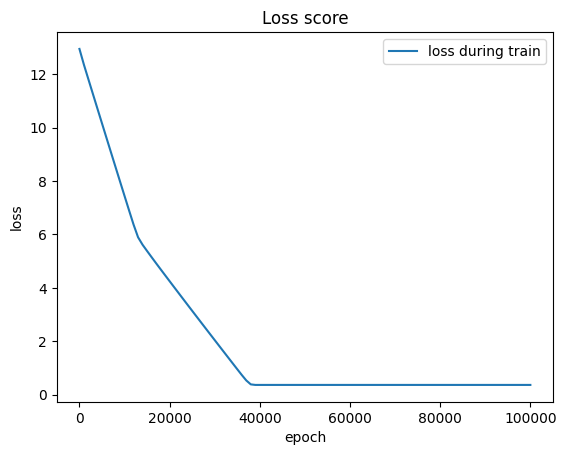

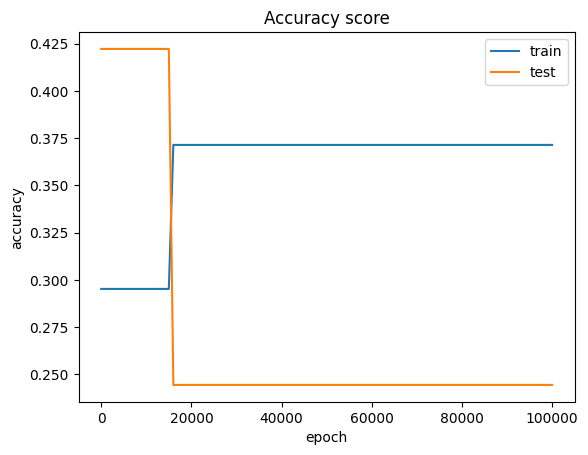

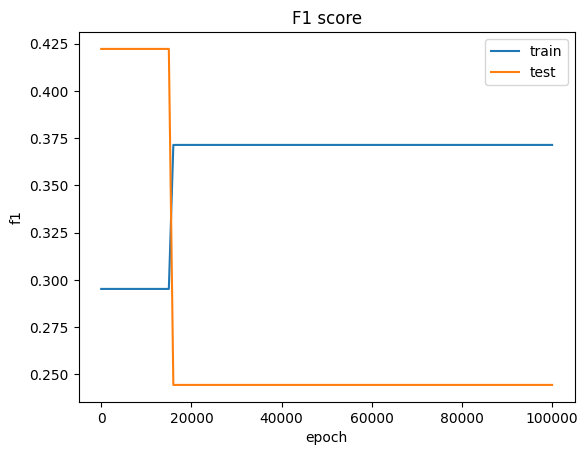

In [24]:
display(loss_scores, f1_scores, acc_scores)
